# 1. Stationary points of a univariate function

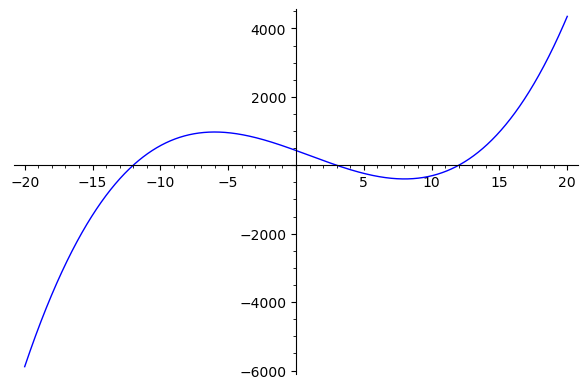

In [12]:
f(x)=x^3-3*x^2-144*x+432
plot(f(x),(x,-20,20))

In [15]:
s=solve(diff(f(x),x)==0,x);s

[x == -6, x == 8]

In [18]:
ddf=diff(f(x),x,2)
ddf.subs(s[0]), ddf.subs(s[1])

(-42, 42)

# 2. Stationary points of multivariate functions

## A simple example

In [87]:
f(x,y)=x^2+y^2-x*y^2

In [88]:
eq=[diff(f(x,y),x)==0,diff(f(x,y),y)==0];eq

[-y^2 + 2*x == 0, -2*x*y + 2*y == 0]

We get three stationary points

In [92]:
s=solve(eq,[x,y]);s

[[x == 0, y == 0], [x == 1, y == -sqrt(2)], [x == 1, y == sqrt(2)]]

To classify them we calculate the Hessian matrix

In [106]:
h=f(x,y).hessian();h

[       2     -2*y]
[    -2*y -2*x + 2]

In [107]:
h.subs(s[0])

[2 0]
[0 2]

This is already diagonal with possitive eigen values, thus the first point is a minimum.

In [108]:
(h.subs(s[1])).eigenvalues()

[-2, 4]

One negative and one positive eigenvalue, thus the second point is a saddle point

In [110]:
(h.subs(s[2])).eigenvalues()

[-2, 4]

One negative and one positive eigenvalue, thus the third point is also a saddle point

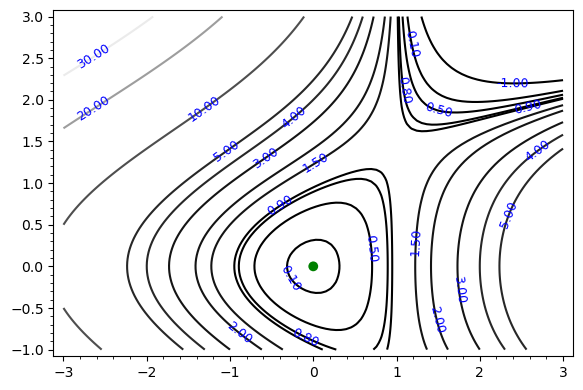

In [120]:
contour_plot(f(x,y),(x,-3,3),(y,-1,3),contours=[-1,.1,.5,.8,.9,1.5,2,3,4,5,10,20,30],fill=False,labels=True)\
+point((0,0),size=50,color="green")

## A more complicated problem

<b>Problem 1</b>: Find a minimum of the function
$$f(x,y,z)=100(y-x^2)^2+(1-x)^2+100(z-y^2)^2+(1-y)^2$$

### Analytical Method

In [33]:
%display latex
x,y,z=var('x y z')
f(x,y,z)=100*(y-x^2)^2+(1-x)^2+100*(z-y^2)^2+(1-y)^2

In [35]:
gf=f(x,y,z).gradient();gf


(400*(x^2 - y)*x + 2*x - 2, -200*x^2 + 400*(y^2 - z)*y + 202*y - 2, -200*y^2 + 200*z)

In [36]:
s=solve([gf[0]==0,gf[1]==0,gf[2]==0],[x,y,z]);s

[[x == 1/20*I*sqrt(102) - 1/2, y == -5/101*I*sqrt(102) + 1/202, z == -5/10201*I*sqrt(102) - 10199/40804], [x == -1/20*I*sqrt(102) - 1/2, y == 5/101*I*sqrt(102) + 1/202, z == 5/10201*I*sqrt(102) - 10199/40804], [x == 1, y == 1, z == 1]]

In [37]:
h=f(x,y,z).hessian();h

[  1200*x^2 - 400*y + 2                 -400*x                      0]
[                -400*x 1200*y^2 - 400*z + 202                 -400*y]
[                     0                 -400*y                    200]

In [41]:
ee=(h.subs(s[-1])).eigenvalues();
n(ee[0]),n(ee[1]),n(ee[2])

(601.667452341669 + 5.68434188608080e-14*I,
 0.475190083363600 - 2.84217094304040e-14*I,
 1401.85735757497 - 5.68434188608080e-14*I)

All eigenvalues are positive, thus this point $x=y=z=1$ is a minimum.

### Numerical method

In [42]:
# we set an initial point to start with
r0=[.2,-40.,-4.]
# the gradient and the Hessian are calculated and used automatically for sage functions
minimize(f(x,y,z),r0)

(0.9999999052523431, 0.9999998305092656, 0.9999996645290813)

The minimization method can be selected using the "algorithm" parameter.
Possible methods are:<br>
'simplex' -- using the downhill simplex algorithm<br>
'powell' -- use the modified Powell algorithm<br>
'bfgs' -- (Broyden-Fletcher-Goldfarb-Shanno) requires gradient<br>
'cg' -- (conjugate-gradient) requires gradient<br>
'ncg' -- (newton-conjugate gradient) requires gradient and hessian<br>
Simplex is usefull for python functions since it does not need the gradient/hessian, <br> otherwise we have to provide the gradient/hessian in special format (NumPy array).

In [43]:
minimize(f(x,y,z),r0,algorithm='simplex')

(0.9999890003182343, 0.9999820037995599, 0.9999672855250671)

Depending on the funcion some algorithms could be considerably faster

In [44]:
%timeit minimize(f(x,y,z),r0,algorithm='ncg')

The slowest run took 4.95 times longer than the fastest. This could mean that an intermediate result is being cached.
111 ms ± 54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit minimize(f(x,y,z),r0,algorithm='simplex')

49 ms ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%timeit minimize(f(x,y,z),r0,algorithm='bfgs')

50.1 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit minimize(f(x,y,z),r0,algorithm='cg')

38 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 3. Numerical optimization with constraints

Find the a minimum of the function
$$u(x,y)=(1-x^2)^2+100(y-x^2)^2\ ,$$
subject to the constraints 
$$\frac{1}{2}\le x \le 3\ ,\ -2\le y \le +2\ .$$

In [22]:
x,y=var('x y')
u(x,y)=(1-x^2)^2+100*(y-x^2)^2

In [23]:
r0=[-1,8]
xymin=minimize_constrained(u(x,y),[(1/2.,3),(-2,2)],r0);xymin

(1.0000239860382485, 1.0000480850080946)

In [24]:
u(xymin[0],xymin[1])

2.302637716400883e-09

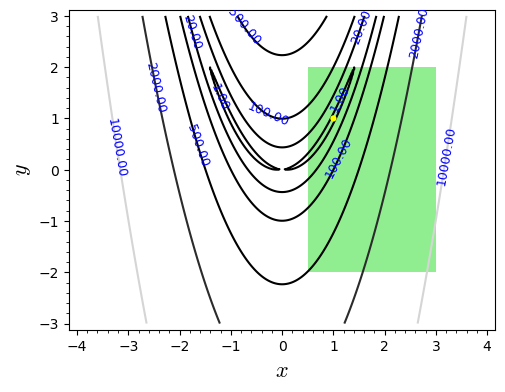

In [25]:
contour_plot(u(x,y),[x,-4,4],[y,-3,3],fill=False,labels=True,\
contours=[1,20,100,500,2000,10000],axes_labels=['$x$','$y$'],plot_points=300)\
+point(xymin,color='yellow',size=20,zorder=3)\
+polygon2d([(1/2,-2), (1/2,2), (3,2),(3,-2)],color='lightgreen')

# 4. Gradient descent and stochastic gradient descent

In [49]:
import numpy as np

We generate ($N=100$) data points around the line $y=2x+1$ with some gaussian noise

In [50]:
data=[[x0+0.5*np.random.normal(0, 6),2.*x0+2.*np.random.normal(0, 6)+1.]\
      for x0 in srange(0,100,1)]

and plot them

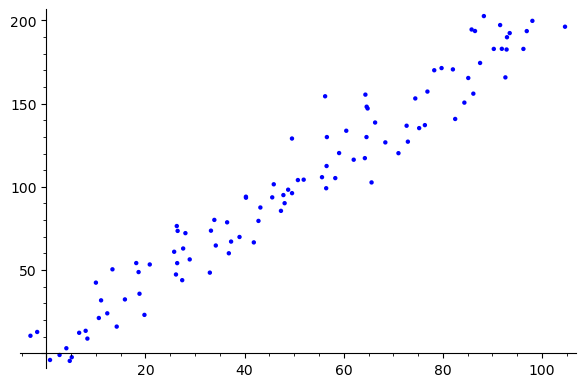

In [51]:
points(data)

We define the sum of squares of the distances of the datapoints $(x,y)_i=[d_0,d_1]_i$ from the line $y=w_2*x+w_1$<br>
$$f(\vec{w})= \sum_{i=1}^N \left(w_2*d_i(0)+w_1-d_i(1)\right)^2$$

In [52]:
def f(w):
    w1,w2=w
    s=[(w2*d[0]+w1-d[1])^2 for d in data]
    return sum(s)

We define the gradient of $f(\vec{w})$
$$\vec{\nabla}f=\left(\frac{\partial f}{\partial w_1},\frac{\partial f}{\partial w_2}\right)
= \left(2\sum_{i=1}^N \left(w_2*d_i(0)+w_1-d_i(1)\right),2\sum_{i=1}^N d_i(0)\left(w_2*d_i(0)+w_1-d_i(1)\right)\right)$$

In [53]:
def gradf(w):
    w1,w2=w
    s1=[(w1+w2*d[0]-d[1]) for d in data]
    s2=[d[0]*(w1+w2*d[0]-d[1]) for d in data]
    gw=vector(RR,[2.*sum(s1),2.*sum(s2)])
    return gw

and the stochastic gradient taking into account only the contribution of a random data set 

In [54]:
def sgradf(w):
    w1,w2=w
    i=ZZ.random_element(0,len(data)-1)
    d=data[i]
    s1=(w1+w2*d[0]-d[1])
    s2=d[0]*(w1+w2*d[0]-d[1])
    gw=vector(RR,[2.*(s1),2.*(s2)])
    return gw


We define the <b><tt> graddescent</tt></b> function that performs optimisation of the function <b><tt> f(w)</tt></b> using the gradient <b><tt> gradf(w)</tt></b>. Here <b><tt> w0</tt></b> is the starting point, <b><tt> maxiters</tt></b> is the maximum number of iterations, <b><tt> acc </tt></b> is a small number that is used to stop iterations whenever the progress is very small and <b><tt> γ </tt></b> is the (initial) step size.

In [55]:
def graddescent(w0,maxiters,acc,γ):
    w=w0
    fw=f(w)
    iters=0
    for i in range(maxiters):
        iters+=1
        wn=w-γ*gradf(w)
        fwn=f(wn)
        if(fwn<=fw):
            cri=abs((fwn-fw)/(fwn+fw))
            if(cri<acc):
                break
            else:
                w=wn
                fw=fwn
                γ=1.3*γ
        else:
            γ=γ/2.
    return w,fw,iters

We define the <b><tt> sgraddescent</tt></b> function that performs  optimisation of the function <b><tt> f(w)</tt></b> using the stochastic gradient <b><tt> sgradf(w)</tt></b>. Here <b><tt> w0</tt></b> is the starting point, <b><tt> maxiters</tt></b> is the maximum number of iterations, <b><tt> acc </tt></b> is a small number that is used to stop iterations whenever the progress is very small and <b><tt> γ </tt></b> is the (initial) step size.

In [56]:
def sgraddescent(w0,maxiters,acc,γ):
    w=w0
    fw=f(w)
    iters=0
    for i in range(maxiters):
        iters+=1
        wn=w-γ*sgradf(w)
        fwn=f(wn)
        if(fwn<=fw):
            cri=abs(fwn-fw)
            if(cri<acc):
                break
            else:
                w=wn
                fw=fwn
                γ=1.3*γ
        else:
            γ=γ/2.
    return w,fw,iters

Here we try to fit the data using both methods

In [59]:
γ=0.02;
acc=10^-14;
w0=vector(RR,[3.1,29.00])
maxiters=10000
w,fw,iters=graddescent(w0,maxiters,acc,γ)
print(" GD:",w,fw,iters)
ws,fw,iters=sgraddescent(w0,maxiters,acc,γ)
print("SGD:",ws,fw,iters)

 GD: (3.14998935288465, 1.95847890877390) 17760.1939843799 10000
SGD: (2.59033294217499, 1.95880613165418) 17795.4081524340 125


The number of iterations used shows how fast a method is. For example, the stochastic method has performed the fit (within the given accurary) using only 125 iterations.

This is the exact solution using sagemath find_fit

In [60]:
a,b=var('a,b')
model(x)=a+b*x
fs=find_fit(data,model)
fs

[a == 3.3475008412029528, b == 1.9555261583290373]

In [61]:
we=vector(RR,[a.subs(fs),b.subs(fs)])
f(we)

17759.1954181626

Here we plot data and fits

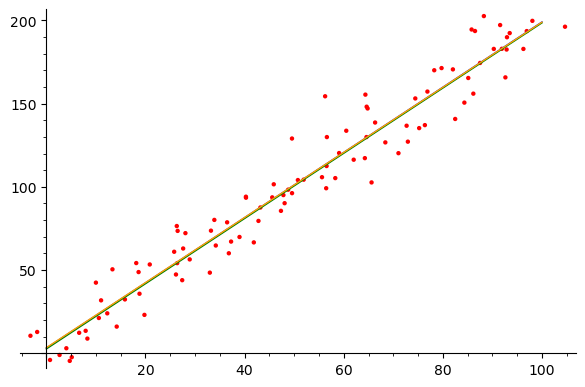

In [62]:
g(x)=model(x).subs(fs)
plot(w[0]+w[1]*x,[x,0,100])+points(data,color='red')+plot(ws[0]+ws[1]*x,[x,0,100],color='green')\
+plot(g(x),[x,0,100],color='orange')

We can also use sagemath minimize the function <b><tt> f(w)</tt></b> automatically, as follows

In [319]:
minimize(f,[3.1,29.00],verbose=True)

Optimization terminated successfully.
         Current function value: 14758.894041
         Iterations: 80
         Function evaluations: 152


(5.08303924461495, 1.9620499123451465)

# 4. Linear programming problems

### Example 1

Solve the problem
\begin{align}
\text{min }& -x-y-3z\nonumber\\
\text{such that }&x+2y\le4\nonumber\\
&5z-y\le8\nonumber\\
&x,y,z\ge0\nonumber
\end{align}

In [63]:
p=MixedIntegerLinearProgram(maximization=False)
v = p.new_variable(real=True, nonnegative=True)
x, y, z = v['x'], v['y'], v['z']
# Set the cost function
p.set_objective(-x - y - 3*z)
# and the constraints
p.add_constraint(x + 2*y <= 4)
p.add_constraint(5*z - y <= 8)

In [64]:
p.solve()

-8.8

In [65]:
p.get_values(x),p.get_values(y),p.get_values(z)

(4.0, 0.0, 1.6)

### Example 2

Solve the problem
\begin{align}
\text{min }& -4 x_1-x_2\nonumber\\
\text{such that }&x_1+x_2\le10\nonumber\\
& x_1+x_2\le10\nonumber\\
&4 x_1-x_2\le20\nonumber\\
&x_1+3x_2\le24\nonumber\\
&x,y,z\ge0\nonumber
\end{align}

In [42]:
p=MixedIntegerLinearProgram(maximization=False)
v = p.new_variable(real=True, nonnegative=True)
x1,x2 = v['x1'], v['x2']
# Set the cost function
p.set_objective(-4*x1-x2)
# and the constraints
p.add_constraint(x1+x2<=10)
p.add_constraint(4*x1-x2<=20)
p.add_constraint(x1+3*x2<=24)

In [43]:
p.solve()

-28.0

In [44]:
p.get_values(x1),p.get_values(x2)

(6.0, 4.0)

Graphical method

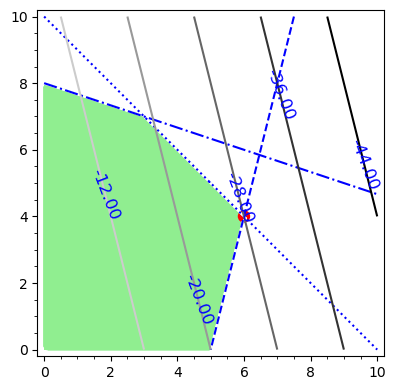

In [46]:
x1,x2=var("x1,x2")
c1=implicit_plot(x1+x2==10,(x1,0,10),(x2,0,10),linestyle=':')
c2=implicit_plot(4*x1-x2==20,(x1,0,10),(x2,0,10),linestyle='--')
c3=implicit_plot(x1+3*x2==24,(x1,0,10),(x2,0,10),linestyle='-.')
rp=region_plot([x1+x2<=10.,4*x1-x2<=20,x1+3*x2<=24,x1>0,x2>0],(x1,0,10),(x2,0,10),\
incol="lightgreen")
cp=contour_plot(-4*x1-x2,(x1,0,10),(x2,0,10),\
labels=True,fill=False,contours=[-44,-36,-28,-20,-12],label_fontsize=12)
poi=point((6,4),pointsize=80,color="red",zorder=1)
show(rp+c1+c2+c3+cp+poi)